# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
# load messages dataset
messages = pd.read_csv('disaster_messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
len(np.unique(messages.id))

26180

In [4]:
# load categories dataset
categories = pd.read_csv('disaster_categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [5]:
len(np.unique(categories.id))

26180

### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [6]:
# merge datasets
df = messages.merge(categories, on='id', how='inner')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [7]:
len(np.unique(categories.id))

26180

### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [8]:
# create a dataframe of the 36 individual category columns
categories.set_index('id', inplace=True)
categories = categories['categories'].str.split(';', expand=True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
id,,,,,,,,,,,,,,,,,,,,,
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
7,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
8,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
9,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
12,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [9]:
# select the first row of the categories dataframe
row = categories.iloc[0, :]

# Extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.str[:-2]
print(category_colnames)

0                    related
1                    request
2                      offer
3                aid_related
4               medical_help
5           medical_products
6          search_and_rescue
7                   security
8                   military
9                child_alone
10                     water
11                      food
12                   shelter
13                  clothing
14                     money
15            missing_people
16                  refugees
17                     death
18                 other_aid
19    infrastructure_related
20                 transport
21                 buildings
22               electricity
23                     tools
24                 hospitals
25                     shops
26               aid_centers
27      other_infrastructure
28           weather_related
29                    floods
30                     storm
31                      fire
32                earthquake
33                      cold
34            

In [10]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

2,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
7,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
8,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
9,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
12,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [11]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].str[-1]
    
    # convert column from string to numeric
    categories[column] = pd.to_numeric(categories[column])
categories.head()

2,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [12]:
# drop the original categories column from `df`
df.drop('categories', axis=1, inplace=True)

df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [13]:
categories.reset_index(inplace=True)
len(np.unique(categories.id))

26180

In [14]:
categories.sum()

2
id                        399601609
related                       20316
request                        4480
offer                           119
aid_related                   10878
medical_help                   2087
medical_products               1314
search_and_rescue               724
security                        471
military                        860
child_alone                       0
water                          1674
food                           2930
shelter                        2319
clothing                        406
money                           604
missing_people                  299
refugees                        876
death                          1196
other_aid                      3448
infrastructure_related         1705
transport                      1203
buildings                      1335
electricity                     534
tools                           159
hospitals                       283
shops                           120
aid_centers               

In [15]:
# concatenate the original dataframe with the new `categories` dataframe
df = df.merge(categories, on='id', how='inner')
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
len(np.unique(df.id))

26180

In [17]:
len(df.id)

26668

In [18]:
df.sum()

C:\Users\luisc\AppData\Local\Temp/ipykernel_5308/1703867807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()


id                                                                405562867
message                   Weather update - a cold front from Cuba that c...
genre                     directdirectdirectdirectdirectdirectdirectdire...
related                                                               20724
request                                                                4579
offer                                                                   125
aid_related                                                           11112
medical_help                                                           2123
medical_products                                                       1329
search_and_rescue                                                       727
security                                                                471
military                                                                869
child_alone                                                               0
water       

### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [19]:
# drop rows with 2s
df = df[df.related != 2]

In [20]:
# check number of duplicates
len(df) - len(df.drop_duplicates(subset=['id']))

449

In [21]:
# drop duplicates
df.drop_duplicates(subset=['id'], inplace=True)

In [22]:
# check number of duplicates
len(df) - len(df.drop_duplicates())

0

In [23]:
import langdetect

def detect_language(x):
    """ Identify what language a string is
     Args:
        x: string to analyze.
    Returns:
        lang: ISO 639-1 language code for analyzed string, or 'Other' if not recognized"""
    try:
        lang = langdetect.detect(x)
    except:
        lang = 'Other'
        
    return lang

In [24]:
# Strip whitespace from message
df['message'] = df['message'].str.strip()

# Apply detect_language function, create column with message's language
df['lang'] = df['message'].apply(detect_language)

# Only keep english language messages
df = df[df['lang'] == 'en']

# Drop lang column
df.drop('lang', axis=1, inplace=True)

In [25]:
df.groupby('related').count()['message']

related
0     6032
1    19661
Name: message, dtype: int64

In [26]:
df

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26663,30261,The training demonstrated how to enhance micro...,NaN,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26664,30262,A suitable candidate has been selected and OCH...,NaN,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26665,30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26666,30264,"Some 2,000 women protesting against the conduc...",NaN,news,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
genre_counts = df.groupby('genre').apply(lambda x: round(x['message'].count()/len(df)*100, 2))

In [31]:
genre_counts.index

Index(['direct', 'news', 'social'], dtype='object', name='genre')

In [27]:
import seaborn as sns

In [47]:
normal_data = np.random.randn(10, 12)

In [49]:
normal_data.shape

(10, 12)

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

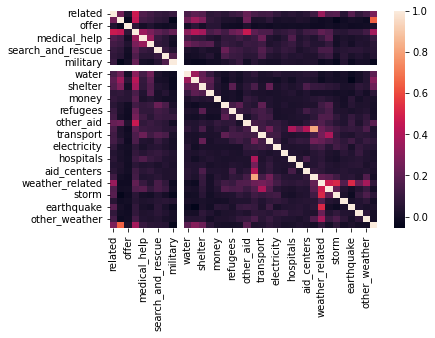

In [52]:
ax = sns.heatmap(df.drop(['id', 'message', 'original', 'genre'],axis=1).corr())

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [29]:
engine = create_engine('sqlite:///DisasterResponse.db')
df.to_sql('MessagesCategories', engine, if_exists='replace', index=False)

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.